In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('brain.csv', index_col=0)

In [27]:
# df['y'] = df['y'].map({1:'H', -1: 'NH'})

In [28]:
df

,X1,X2,y
0,2.947814,6.626878,1
1,2.530388,7.785050,1
2,3.566991,5.651046,1
3,3.156983,5.467077,1
4,2.582346,4.457777,-1
5,2.155826,6.222343,-1
6,3.273418,3.520687,-1


/usr/local/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/usr/local/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/Users/johnminer/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x11996d550>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/johnminer/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support [<matplotli

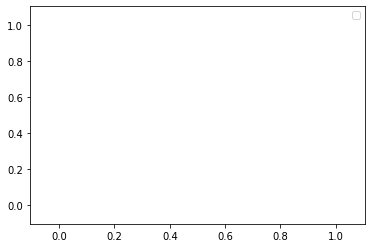

In [29]:
blue = plt.plot(df[df['y'] == 'H']['X1'], df[df['y'] == 'H']['X2'], color="blue", marker='o',linestyle='')
red = plt.plot(df[df['y'] == 'NH']['X1'], df[df['y'] == 'NH']['X2'], color='red', marker='o', linestyle='')
plt.legend([red, blue], ["Not healthy", "Healthy"])
plt.show()

['b', 'b', 'b', 'b', 'r', 'r', 'r']
['H', 'H', 'H', 'H', 'NH', 'NH', 'NH']


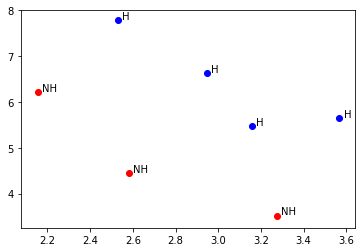

In [30]:
X1=df['X1']
X2=df['X2']
X_train=np.array(list(zip(X1,X2)))

y_train=df['y'].values

color_ls = []
# if y == 1, then the value at the same index in color_ls will be 'b'
# otherwise, it will be 'r'
for k in y_train:
    if k == 1:
        color_ls.append('b')
    else:
        color_ls.append('r')

print(color_ls)

label = []
# if y == 1, then the value at the same index in label will be 'H'
# otherwise, it will be 'NH'
for k in y_train:
    if k == 1:
        label.append('H')
    else:
        label.append('NH')

print(label)

# k is our index, (i,j) are our Serotonin and Dopamine pairings.
# For example, here are the values on the first iteration of the loop:
# k == 0, (i, j) == (2.947814, 6.626878)
for k, (i,j) in enumerate(X_train):
    # add the datapoint to a scatter plot,
    # using the k'th color in colors_ls
    plt.scatter(i, j, c = color_ls[k])
    # 0.02 to the right and above the point,
    # add the k'th text label in label
    plt.text(i+0.02, j+0.02, label[k])

In [31]:
from sklearn import svm
svm_classifier = svm.SVC(kernel='linear', C=10)
svm_classifier.fit(X_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [32]:

# Helper function to plot the best fit line,
# as well as marking the closest data points to the line,
# through dotted lines (margins)
def plot_decision_boundary(clf, X, y):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max),np.arange(x2_min, x2_max))
    Z = clf.decision_function(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    plt.contour(xx1, xx2, Z, colors='b', levels=[-1, 0, 1], alpha=0.4, linestyles=['--', '-', '--'])
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

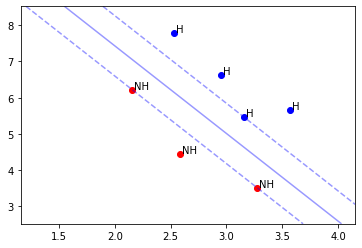

In [33]:
# pass in the trained model and data points,
# and plot the best fit line + margins
plot_decision_boundary(svm_classifier, X_train, y_train)

# plot data points + color/labels
for k, (i,j) in enumerate(X_train):
    plt.scatter(i, j, c = color_ls[k])
    plt.text(i+0.02, j+0.02, label[k])

In [34]:
svm_classifier.n_support_

array([2, 1], dtype=int32)

In [35]:
svm_classifier.support_vectors_

array([[2.155826, 6.222343],
       [3.273418, 3.520687],
       [3.156983, 5.467077]])

In [36]:
# Obtain the slope (weight) and intercept for the best fit line equation: 

# a + b
weight=svm_classifier.coef_
# c
intercept=svm_classifier.intercept_
print(weight)
print(intercept)

[[2.90336685 1.20121959]]
[-14.73321143]


Text(3.02, 6.02, 'New person')

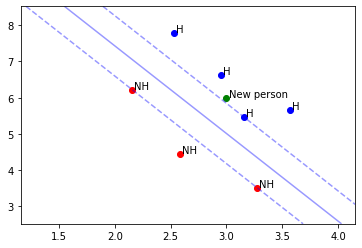

In [40]:
# pass in the trained model and data points,
# and plot the best fit line + margins
plot_decision_boundary(svm_classifier, X_train, y_train)

# plot data points + color/labels
for k, (i,j) in enumerate(X_train):
    plt.scatter(i, j, c = color_ls[k])
    plt.text(i+0.02, j+0.02, label[k])
plt.scatter(3,6, c = 'g')
plt.text(3+0.02, 6+0.02, 'New person')

In [51]:
def am_healthy(new_data_ls):
    pred = svm_classifier.predict([new_data])
    for i in pred
        if i == 1:
            print('You are healthy')
        else:
            print('You are not healthy')

In [52]:
pred = svm_classifier.predict([[3,6]])

In [53]:
am_healthy([7,8])

You are healthy


In [68]:
df2 = pd.read_csv('SVM_Dataset2.csv')

['r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b']
['NH', 'NH', 'NH', 'NH', 'NH', 'NH', 'NH', 'NH', 'NH', 'NH', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H']


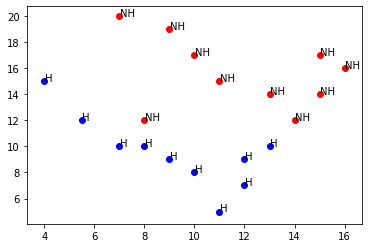

In [69]:
X1=df2['x1']
X2=df2['x2']
X_train=np.array(list(zip(X1,X2)))

y_train=df2['y'].values

color_ls = []
# if y == 1, then the value at the same index in color_ls will be 'b'
# otherwise, it will be 'r'
for k in y_train:
    if k == 1:
        color_ls.append('b')
    else:
        color_ls.append('r')

print(color_ls)

label = []
# if y == 1, then the value at the same index in label will be 'H'
# otherwise, it will be 'NH'
for k in y_train:
    if k == 1:
        label.append('H')
    else:
        label.append('NH')

print(label)

# k is our index, (i,j) are our Serotonin and Dopamine pairings.
# For example, here are the values on the first iteration of the loop:
# k == 0, (i, j) == (2.947814, 6.626878)
for k, (i,j) in enumerate(X_train):
    # add the datapoint to a scatter plot,
    # using the k'th color in colors_ls
    plt.scatter(i, j, c = color_ls[k])
    # 0.02 to the right and above the point,
    # add the k'th text label in label
    plt.text(i+0.02, j+0.02, label[k])

array([[ 8. , 12. ],
       [ 4. , 15. ],
       [ 5.5, 12. ],
       [13. , 10. ]])

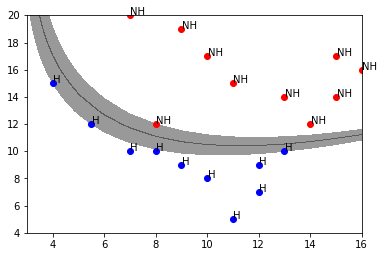

In [71]:

# Apply different SVM kernels, (linear, polynomial or RBF) to obtain the best classifier for SVM_Dataset2.csv

import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt

df=pd.read_csv('SVM_Dataset2.csv')


X1=df['x1']
X2=df['x2']

X_train=np.array(list(zip(X1,X2)))
y_train=df['y'].values

# svm_classifier = svm.SVC(kernel='linear', C=10)
svm_classifier = svm.SVC(kernel='poly', C=10)
# svm_classifier = svm.SVC(kernel='poly',C=1, degree=2)
# svm_classifier = svm.SVC(kernel='rbf', gamma=0.1, C=100)
svm_classifier.fit(X_train, y_train)

color_ls = []
for k in y_train:
    if k == 1:
        color_ls.append('b')
    else:
        color_ls.append('r')
color_ls

label = []
for k in y_train:
    if k == 1:
        label.append('H')
    else:
        label.append('NH')
label

def plot_decision_boundary(clf, X, y):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max),np.arange(x2_min, x2_max))
    Z = clf.decision_function(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, colors='k', levels=[-1, 0, 1], alpha=0.4, linestyles=['--', '-', '--'])
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    

plot_decision_boundary(svm_classifier, X_train, y_train)

for k, (i,j) in enumerate(X_train):
    plt.scatter(i, j, c = color_ls[k])
    plt.text(i+0.02, j+0.02, label[k])
    
svm_classifier.support_vectors_

In [87]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

# we create two clusters of random points
n_samples_1 = 1000
n_samples_2 = 100
centers = [[0.0, 0.0], [2.0, 2.0]]
clusters_std = [1.5, 0.5]
X, y = make_blobs(n_samples=[n_samples_1, n_samples_2],
                  centers=centers,
                  cluster_std=clusters_std,
                  random_state=0, shuffle=False)

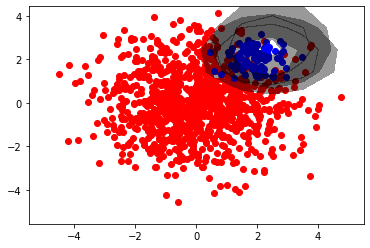

In [126]:
svm_classifier1 = svm.SVC(kernel='rbf', gamma=0.1, C=1)
svm_classifier2 = svm.SVC(kernel='rbf', gamma=0.1, C=1, class_weight={1:10})
svm_classifier1.fit(X, y)
svm_classifier2.fit(X, y)
plt.scatter([X[i][0] for i in range(len(X)) if y[i] == 0], [X[i][1] for i in range(len(X)) if y[i] == 0], c='r')
plt.scatter([X[i][0] for i in range(len(X)) if y[i] == 1], [X[i][1] for i in range(len(X)) if y[i] == 1], c='b')
plot_decision_boundary(svm_classifier2, X, y)
plot_decision_boundary(svm_classifier1, X, y)

In [114]:
pred2 = svm_classifier2.predict(X)

In [115]:
pred1 = svm_classifier1.predict(X)

In [116]:
acc1 = [1 if y[i] == pred1[i] and y[i] == 1 else 0 for i in range(len(pred1))]
acc2 = [1 if y[i] != pred1[i] and y[i] == 0 else 0 for i in range(len(pred1))]
acc3 = [1 if y[i] != pred1[i] and y[i] == 1 else 0 for i in range(len(pred1))]
acc4 = [1 if y[i] == pred1[i] and y[i] == 0 else 0 for i in range(len(pred1))]
print((sum(acc1),sum(acc2)))
print((sum(acc3),sum(acc4)))

(88, 26)
(12, 974)
